<a href="https://colab.research.google.com/github/natdebandi/migmobs_exploratory/blob/main/Mobility_v3_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIGMOBS

**Natalia Dedandi**



##Mobitity

Source: Global_Transnational_Mobility_dataset v2 (2025)

Exploratoty analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# prompt: open a csv file forma drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/GTMD2_Data_MIGMOBS_share.csv'

mobility_df = pd.read_csv(file_path)


Mounted at /content/drive


In [4]:
mobility_df

,code_i,code_j,country_i,country_j,year,iso2code_i,iso2code_j,iso3code_i,iso3code_j,iso3code_ij,...,dgd_polity_i,dgd_polity_j,dgd_sanction_threat,dgd_sanction_imposition,dgd_capital_const_j,dgd_capital_const_i,dgd_agree_fta,dgd_agree_eia,dgd_agree_cu,dgd_agree_pta
0,4,8,Afghanistan,Albania,1995,AF,AL,AFG,ALB,AFGALB,...,0.0,5.0,0.0,0.0,102214.53,NaN,0.0,0.0,0.0,0.0
1,4,8,Afghanistan,Albania,1996,AF,AL,AFG,ALB,AFGALB,...,-7.0,0.0,0.0,0.0,103580.22,NaN,0.0,0.0,0.0,0.0
2,4,8,Afghanistan,Albania,1997,AF,AL,AFG,ALB,AFGALB,...,-7.0,5.0,0.0,0.0,103189.45,NaN,0.0,0.0,0.0,0.0
3,4,8,Afghanistan,Albania,1998,AF,AL,AFG,ALB,AFGALB,...,-7.0,5.0,0.0,0.0,102951.47,NaN,0.0,0.0,0.0,0.0
4,4,8,Afghanistan,Albania,1999,AF,AL,AFG,ALB,AFGALB,...,-7.0,5.0,0.0,0.0,103443.45,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547857,894,891,Zambia,Serbia and Montenegro,2002,ZM,CS,ZMB,SCG,ZMBSCG,...,5.0,7.0,0.0,0.0,NaN,198651.66,0.0,0.0,0.0,0.0
1547858,894,891,Zambia,Serbia and Montenegro,2003,ZM,CS,ZMB,SCG,ZMBSCG,...,5.0,6.0,0.0,0.0,NaN,202194.95,0.0,0.0,0.0,0.0
1547859,894,891,Zambia,Serbia and Montenegro,2004,ZM,CS,ZMB,SCG,ZMBSCG,...,5.0,6.0,0.0,0.0,NaN,204767.05,0.0,0.0,0.0,0.0
1547860,894,891,Zambia,Serbia and Montenegro,2005,ZM,CS,ZMB,SCG,ZMBSCG,...,5.0,6.0,0.0,0.0,NaN,207327.63,0.0,0.0,0.0,0.0


In [5]:
# Filter for countries CHL and ARG
countries_target = ['CHL', 'ARG']

#target_iso3 country of destiny
country_df = mobility_df[mobility_df['iso3code_j'].isin(countries_target)]

Using  gtmd2_trips_s1  (divided by 100.000) to easy plot.

In [12]:
#contruyo un indicador por pais de destino.
country_df_grp = country_df.groupby(['year','iso3code_j',])['gtmd2_trips_s1'].sum().reset_index()
country_df_grp['gtmd2_trips_s1'] = (country_df_grp['gtmd2_trips_s1'] / 100000).round(2)

In [14]:
# Pivotar los datos para obtener las columnas con los países como series
pivot_data = country_df_grp.pivot_table(index='year', columns='iso3code_j', values='gtmd2_trips_s1', aggfunc='sum').fillna(0)
pivot_data

iso3code_j,ARG,CHL
year,,
1995,106.27,52.06
1996,114.38,51.35
1997,121.31,58.85
1998,136.37,63.84
1999,134.55,58.89
2000,144.69,61.57
2001,128.33,58.40
2002,104.36,57.95
2003,104.81,60.27


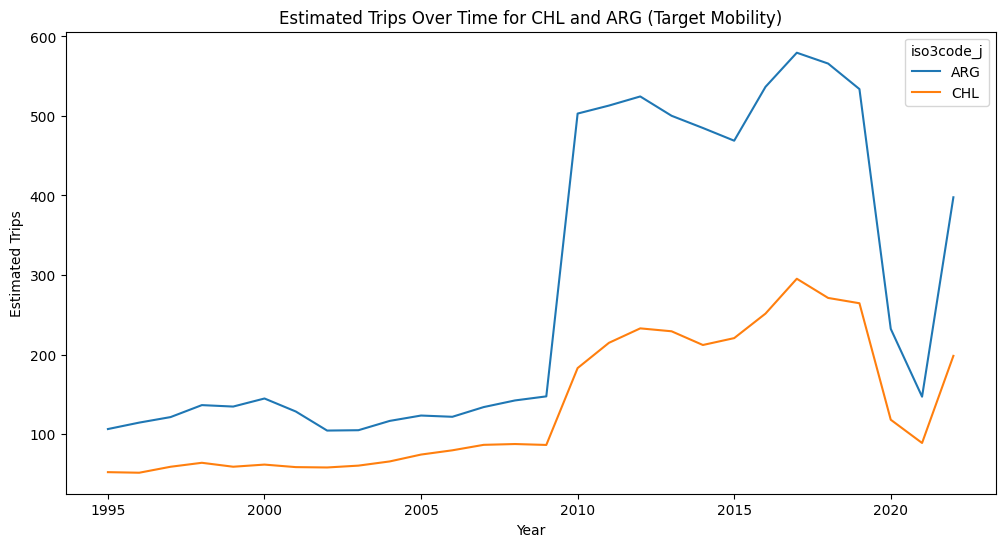

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='gtmd2_trips_s1', hue='iso3code_j', data=country_df_grp)
plt.title('Estimated Trips Over Time for CHL and ARG (Target Mobility)')
plt.xlabel('Year')
plt.ylabel('Estimated Trips')
plt.show()

now **gtmd2_trips_s2**

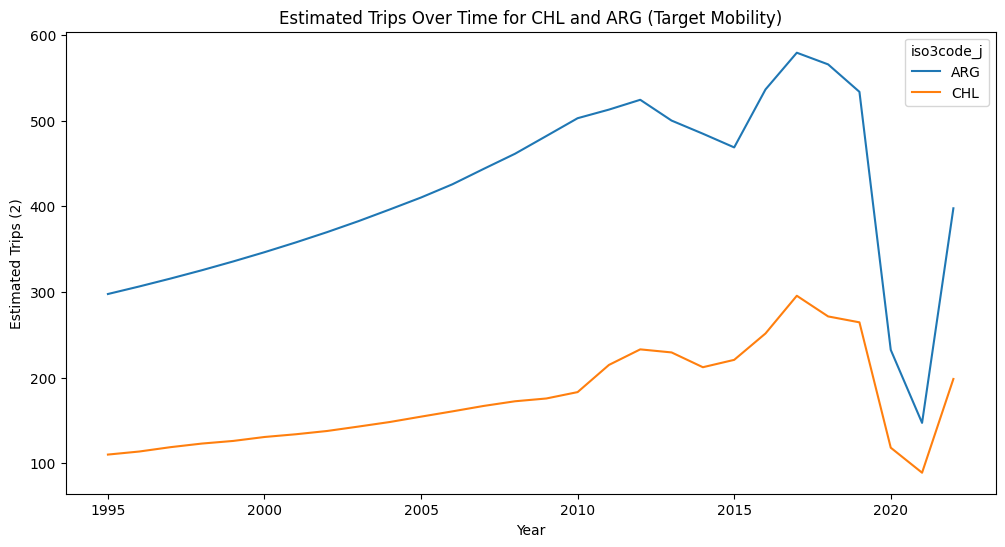

In [17]:
country_df_grp2 = country_df.groupby(['year','iso3code_j',])['gtmd2_trips_s2'].sum().reset_index()
country_df_grp2['gtmd2_trips_s2'] = (country_df_grp2['gtmd2_trips_s2'] / 100000).round(2)
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='gtmd2_trips_s2', hue='iso3code_j', data=country_df_grp2)
plt.title('Estimated Trips Over Time for CHL and ARG (Target Mobility)')
plt.xlabel('Year')
plt.ylabel('Estimated Trips (2)')
plt.show()

In [20]:
# Pivotar los datos para obtener las columnas con los países como series
pivot_data = country_df_grp2.pivot_table(index='year', columns='iso3code_j', values='gtmd2_trips_s2', aggfunc='sum').fillna(0)
pivot_data = pivot_data[(pivot_data.index >= 2011) & (pivot_data.index <= 2016)]
pivot_data

iso3code_j,ARG,CHL
year,,
2011,513.04,214.69
2012,524.52,232.88
2013,500.23,229.30
2014,484.88,212.02
2015,468.88,220.62
2016,536.60,251.46


Why are the numbers so different from the GTM 1 base? For example in 2011 for ARG we had 121.3 (x 100 thousand) and now we have 513 (x 100 thousand).

Check other countries to check values. I'll uso gtmd2_trips_s2

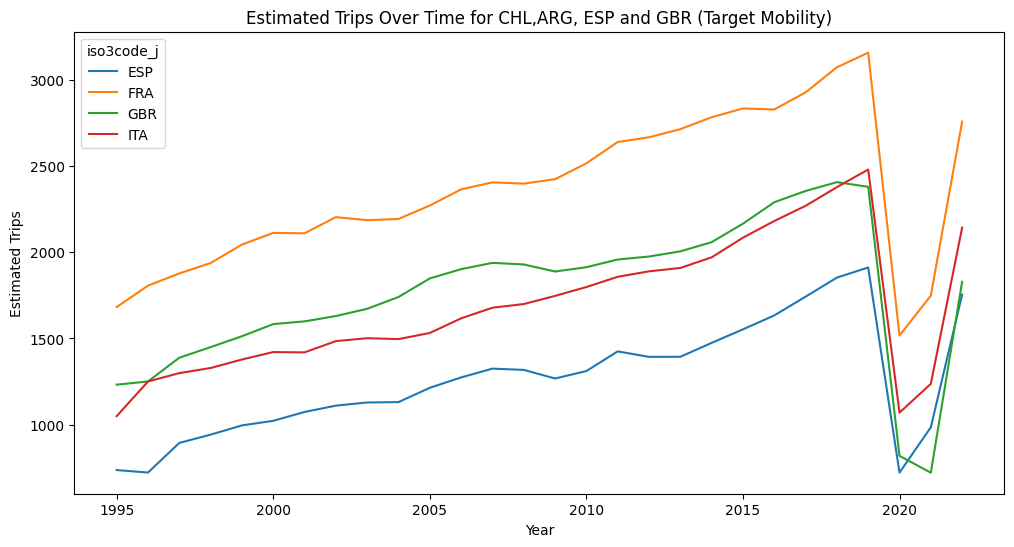

In [23]:
##Check for other countries the dinamic

countries_b = ['ESP','GBR','FRA','ITA']

country_b = mobility_df[mobility_df['iso3code_j'].isin(countries_b)]

country_b_grp = country_b.groupby(['year','iso3code_j',])['gtmd2_trips_s2'].sum().reset_index()
country_b_grp['gtmd2_trips_s2'] = (country_b_grp['gtmd2_trips_s2'] / 100000).round(2)

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='gtmd2_trips_s2', hue='iso3code_j', data=country_b_grp)
plt.title('Estimated Trips Over Time for CHL,ARG, ESP and GBR (Target Mobility)')
plt.xlabel('Year')
plt.ylabel('Estimated Trips')
plt.show()

### Trips to CHL and ARG by regions

gtmd2_strregion_i                 GTMD2 world region origin, string      

gtmd2_region_i                    GTMD2 world region origin, num

gtmd2_strregion_j                 GTMD2 world region destination, string  

gtmd2_region_j                    GTMD2 world region destination, num


In [66]:

country_df_grp = country_df.groupby(['year','iso3code_j','gtmd2_strregion_i',])['gtmd2_trips_s2'].sum().reset_index()
country_df_grp['gtmd2_trips_s2'] = (country_df_grp['gtmd2_trips_s2'] / 100000).round(2)


In [67]:
country_df_grp

,year,iso3code_j,gtmd2_strregion_i,gtmd2_trips_s2
0,1995,ARG,Central and Southern Asia,0.21
1,1995,ARG,Eastern and South-Eastern Asia,0.60
2,1995,ARG,Europe,4.66
3,1995,ARG,Latin America and the Caribbean,287.49
4,1995,ARG,Northern Africa and Western Asia,0.96
...,...,...,...,...
443,2022,CHL,Latin America and the Caribbean,181.22
444,2022,CHL,Northern Africa and Western Asia,0.91
445,2022,CHL,Northern America,5.96
446,2022,CHL,Oceania,0.46


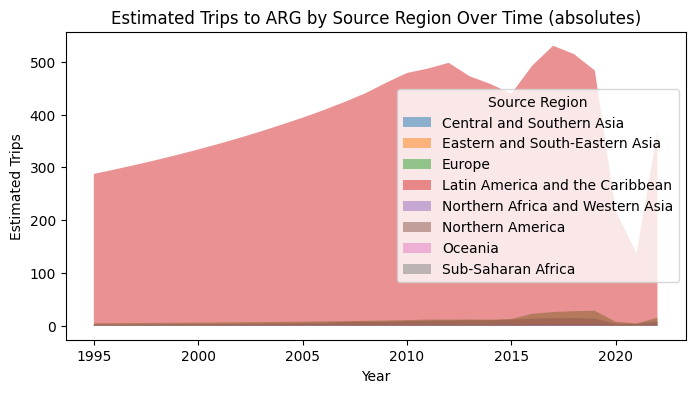

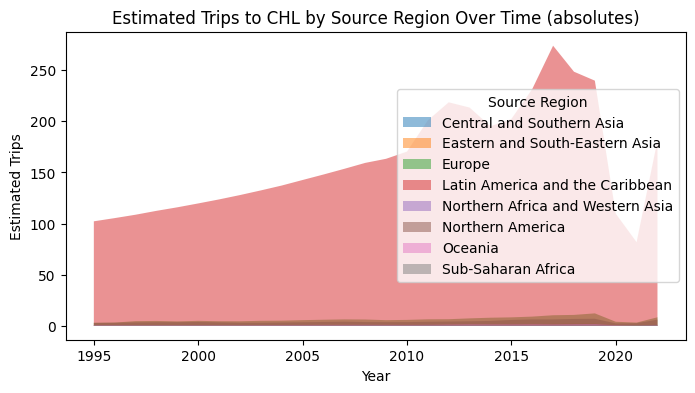

In [68]:
#plot for each country estimated trips by source_region and year
for target in country_df_grp['iso3code_j'].unique():
    target_data = country_df_grp[country_df_grp['iso3code_j'] == target]
    plt.figure(figsize=(8, 4))

    for region in target_data['gtmd2_strregion_i'].unique():
        region_data = target_data[target_data['gtmd2_strregion_i'] == region]
        plt.fill_between(region_data['year'], region_data['gtmd2_trips_s2'], label=region, alpha=0.5)

    plt.title(f'Estimated Trips to {target} by Source Region Over Time (absolutes)')
    plt.xlabel('Year')
    plt.ylabel('Estimated Trips')
    plt.legend(title='Source Region')
    plt.show()

**Distribution by region (%)**

In [69]:
# Create a new column 'Region_Group' based on 'gtmd2_strregion_i'
def categorize_region(region):
  if region == 'Latin America and the Caribbean':
    return 'Latin America and the Caribbean'
  elif region == 'Northern America':
    return 'Northern America'
  elif region == 'Europe':
    return 'Europe'
  else:
    return 'Otros'

country_df_grp['Region_Group'] = country_df_grp['gtmd2_strregion_i'].apply(categorize_region)

# Group by year, iso2code_j, and Region_Group, then sum gtmd2_trips_s2
grouped_df = country_df_grp.groupby(['year', 'iso3code_j', 'Region_Group'])['gtmd2_trips_s2'].sum().reset_index()

# Display the new DataFrame
grouped_df


,year,iso3code_j,Region_Group,gtmd2_trips_s2
0,1995,ARG,Europe,4.66
1,1995,ARG,Latin America and the Caribbean,287.49
2,1995,ARG,Northern America,2.12
3,1995,ARG,Otros,3.28
4,1995,CHL,Europe,2.86
...,...,...,...,...
219,2022,ARG,Otros,4.46
220,2022,CHL,Europe,8.26
221,2022,CHL,Latin America and the Caribbean,181.22
222,2022,CHL,Northern America,5.96


In [71]:
##distribution by region (%)
# Calculate total trips per year
total_trips_by_year = grouped_df.groupby(['year', 'iso3code_j'])['gtmd2_trips_s2'].sum().reset_index()

# Merge total trips back into the original grouped data
grouped_df = pd.merge(grouped_df, total_trips_by_year, on=['year', 'iso3code_j'], suffixes=('', '_total'))

# Calculate percentage
grouped_df['percentage'] = (grouped_df['gtmd2_trips_s2'] / grouped_df['gtmd2_trips_s2_total']) * 100

grouped_df

,year,iso3code_j,Region_Group,gtmd2_trips_s2,gtmd2_trips_s2_total,percentage
0,1995,ARG,Europe,4.66,297.55,1.566123
1,1995,ARG,Latin America and the Caribbean,287.49,297.55,96.619056
2,1995,ARG,Northern America,2.12,297.55,0.712485
3,1995,ARG,Otros,3.28,297.55,1.102336
4,1995,CHL,Europe,2.86,109.95,2.601182
...,...,...,...,...,...,...
219,2022,ARG,Otros,4.46,397.74,1.121336
220,2022,CHL,Europe,8.26,198.30,4.165406
221,2022,CHL,Latin America and the Caribbean,181.22,198.30,91.386788
222,2022,CHL,Northern America,5.96,198.30,3.005547


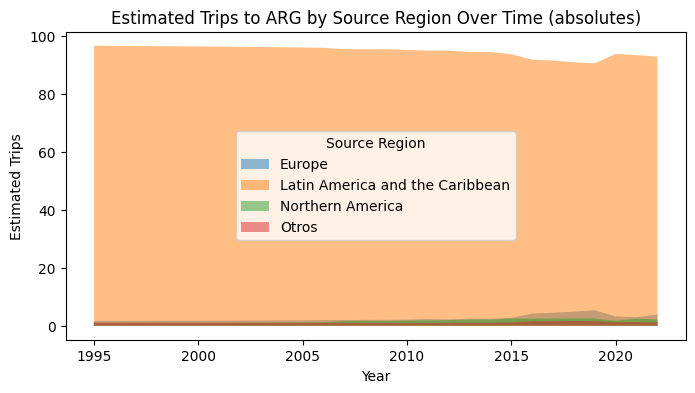

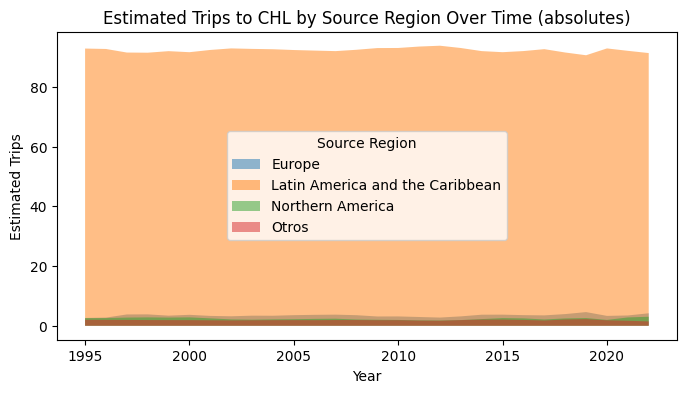

In [72]:
#plot for each country estimated trips by source_region and year
for target in grouped_df['iso3code_j'].unique():
    target_data = grouped_df[grouped_df['iso3code_j'] == target]
    plt.figure(figsize=(8, 4))

    for region in target_data['Region_Group'].unique():
        region_data = target_data[target_data['Region_Group'] == region]
        plt.fill_between(region_data['year'], region_data['percentage'], label=region, alpha=0.5)

    plt.title(f'Estimated Trips to {target} by Source Region Over Time (absolutes)')
    plt.xlabel('Year')
    plt.ylabel('Estimated Trips')
    plt.legend(title='Source Region')
    plt.show()

### Main countries of the Americas traveling to ARG and CHL

In [73]:
americas_df_ar = country_df[(country_df['gtmd2_strregion_i'] == 'Latin America and the Caribbean') & (country_df['iso3code_j'] == 'ARG')]
americas_df_ar_grp = americas_df_ar.groupby(['year','iso3code_i',])['gtmd2_trips_s2'].sum().reset_index()
americas_df_ar_grp['gtmd2_trips_s2'] = (americas_df_ar_grp['gtmd2_trips_s2'] / 100000).round(2)

top5_americas_ar = americas_df_ar_grp.sort_values(['year', 'gtmd2_trips_s2'], ascending=[True, False]).groupby(['year']).head(6)
top5_americas_ar.head()

,year,iso3code_i,gtmd2_trips_s2
40,1995,URY,99.12
9,1995,CHL,57.56
35,1995,PRY,55.54
7,1995,BRA,42.03
6,1995,BOL,23.99


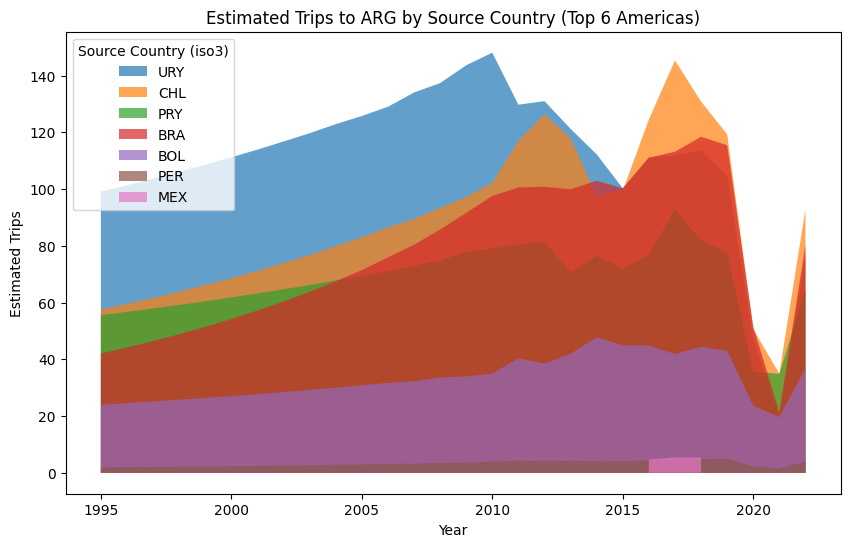

In [75]:

    plt.figure(figsize=(10, 6))
    for source in top5_americas_ar['iso3code_i'].unique():
        source_data = top5_americas_ar[top5_americas_ar['iso3code_i'] == source]
        plt.fill_between(source_data['year'], source_data['gtmd2_trips_s2'], label=source, alpha=0.7)

    plt.title(f'Estimated Trips to ARG by Source Country (Top 6 Americas)')
    plt.xlabel('Year')
    plt.ylabel('Estimated Trips')
    plt.legend(title='Source Country (iso3)', loc='upper left')
    plt.show()

In [93]:
americas_df_ch = country_df[(country_df['gtmd2_strregion_i'] == 'Latin America and the Caribbean') & (country_df['iso3code_j'] == 'CHL')]

americas_df_ch_grp = americas_df_ch.groupby(['year','iso3code_i',])['gtmd2_trips_s2'].sum().reset_index()
americas_df_ch_grp['gtmd2_trips_s2'] = (americas_df_ch_grp['gtmd2_trips_s2'] / 100000).round(2)
top5_americas_ch = americas_df_ch_grp.sort_values(['year', 'gtmd2_trips_s2'], ascending=[True, False]).groupby(['year']).head(6)

top5_americas_ch

,year,iso3code_i,gtmd2_trips_s2
3,1995,ARG,56.41
7,1995,BOL,18.05
33,1995,PER,15.48
8,1995,BRA,2.12
35,1995,PRY,2.05
...,...,...,...
1303,2022,PER,42.84
1275,2022,BOL,19.95
1276,2022,BRA,5.90
1278,2022,COL,4.02


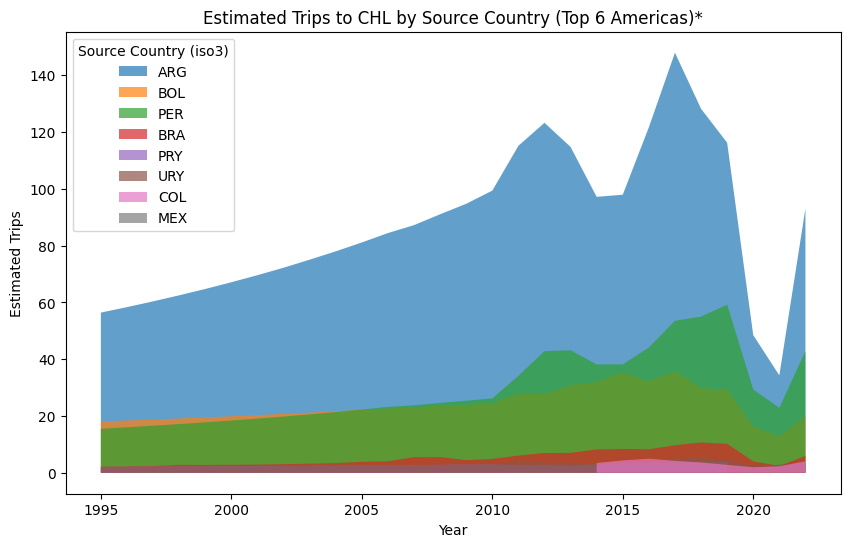

In [94]:
    plt.figure(figsize=(10, 6))
    for source in top5_americas_ch['iso3code_i'].unique():
        source_data = top5_americas_ch[top5_americas_ch['iso3code_i'] == source]
        plt.fill_between(source_data['year'], source_data['gtmd2_trips_s2'], label=source, alpha=0.7)

    plt.title(f'Estimated Trips to CHL by Source Country (Top 6 Americas)*')
    plt.xlabel('Year')
    plt.ylabel('Estimated Trips')
    plt.legend(title='Source Country (iso3)', loc='upper left')
    plt.show()

### Analizing in particular Bolivia and Venezuela in the mobilities to Chile and Argentina.

In [96]:
#country_df is already filtered by CHL and ARG as target countries

df_ven_bol = country_df[country_df['iso3code_i'].isin(['BOL', 'VEN','CHL','ARG'])]
df_ven_bol = df_ven_bol.groupby(['iso3code_j','year','iso3code_i',])['gtmd2_trips_s2'].sum().reset_index()
df_ven_bol['gtmd2_trips_s2'] = (df_ven_bol['gtmd2_trips_s2'] / 100000).round(2)
df_ven_bol = df_ven_bol.sort_values(['year', 'gtmd2_trips_s2'], ascending=[True, False])
df_ven_bol.head()

,iso3code_j,year,iso3code_i,gtmd2_trips_s2
1,ARG,1995,CHL,57.56
84,CHL,1995,ARG,56.41
0,ARG,1995,BOL,23.99
85,CHL,1995,BOL,18.05
2,ARG,1995,VEN,0.85


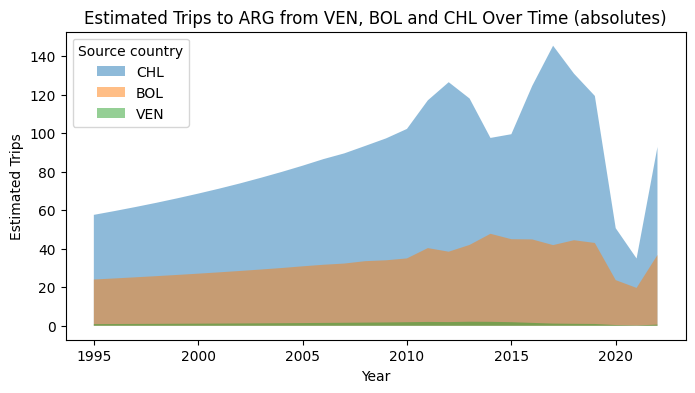

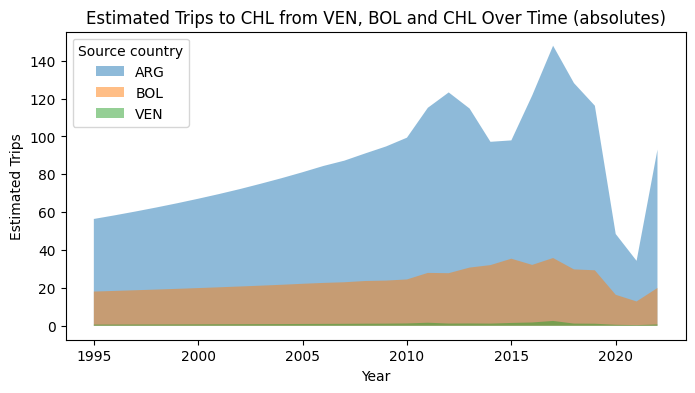

In [97]:
#plot for each country estimated trips by source_region and year
for target in df_ven_bol['iso3code_j'].unique():
    target_data = df_ven_bol[df_ven_bol['iso3code_j'] == target]
    plt.figure(figsize=(8, 4))

    for country in target_data['iso3code_i'].unique():
        country_data = target_data[target_data['iso3code_i'] == country]
        plt.fill_between(country_data['year'], country_data['gtmd2_trips_s2'], label=country, alpha=0.5)

    plt.title(f'Estimated Trips to {target} from VEN, BOL and CHL Over Time (absolutes)')
    plt.xlabel('Year')
    plt.ylabel('Estimated Trips')
    plt.legend(title='Source country')
    plt.show()

**Compare travels from Bolivia to ARG and CHL**.

In [101]:
# Filtrar los datos para obtener solo los viajes desde BOL hacia CHL y ARG
filtered_data_bol = df_ven_bol[(df_ven_bol['iso3code_i'] == 'BOL')]

In [103]:
# prompt: transform year in filtered_data_bol as integer

# Convert 'year' column to integer type
filtered_data_bol['year'] = filtered_data_bol['year'].astype(int)


<ipython-input-103-abfb60c8badc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_bol['year'] = filtered_data_bol['year'].astype(int)


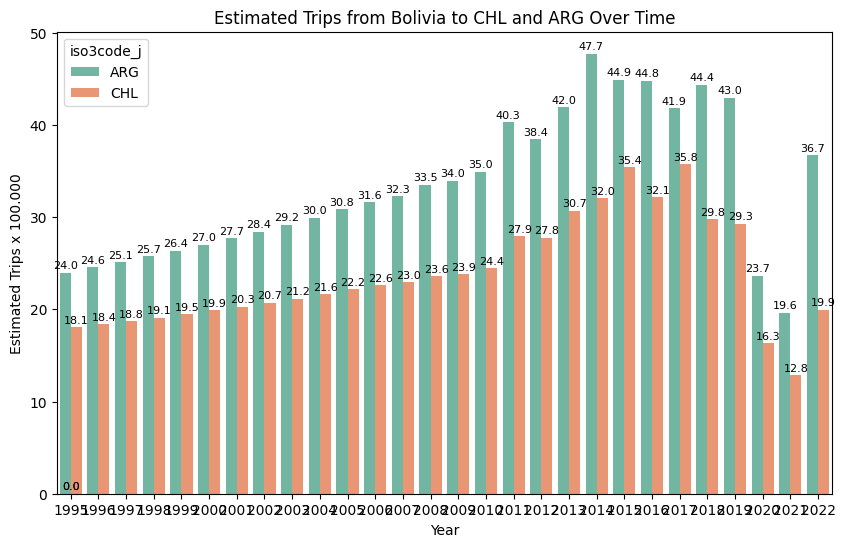

In [104]:
# Create the bar plot

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='year', y='gtmd2_trips_s2', hue='iso3code_j', data=filtered_data_bol, palette = "Set2")
plt.title('Estimated Trips from Bolivia to CHL and ARG Over Time')
plt.xlabel('Year')
plt.ylabel('Estimated Trips x 100.000')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

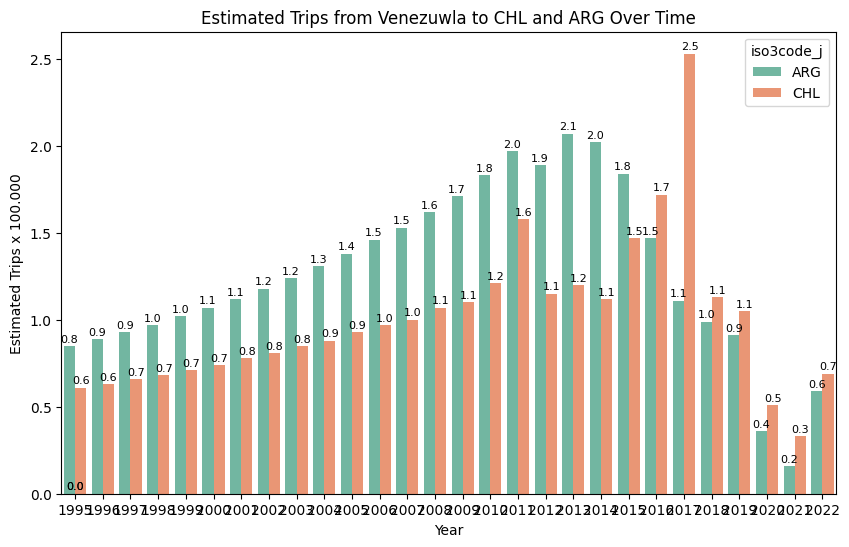

In [105]:
# Filtrar los datos para obtener solo los viajes desde BOL hacia CHL y ARG
filtered_data_bol = df_ven_bol[(df_ven_bol['iso3code_i'] == 'VEN')]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='year', y='gtmd2_trips_s2', hue='iso3code_j', data=filtered_data_bol, palette = "Set2")
plt.title('Estimated Trips from Venezuwla to CHL and ARG Over Time')
plt.xlabel('Year')
plt.ylabel('Estimated Trips x 100.000')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

## Ratio of mobility per population

wpp_pop_i                         UN WPP total population origin          
wpp_pop_j                         UN WPP total population destinatio

In [115]:
# Filter for countries CHL and ARG
countries_source = ['CHL', 'ARG']

#target_iso3 country of destiny
country_source_df = mobility_df[mobility_df['iso3code_j'].isin(countries_target)]

country_source_df_grp=country_source_df.groupby(['year','iso3code_j',])['gtmd2_trips_s2'].sum().reset_index()



In [116]:
##obtengo el total de población
wpp_pop_j_by_year = country_source_df.groupby(['year', 'iso3code_j'])['wpp_pop_j'].mean().reset_index()

country_source_df_grp = pd.merge(country_source_df_grp, wpp_pop_j_by_year, on=['year', 'iso3code_j'], how='left')

country_source_df_grp.head()

,year,iso3code_j,gtmd2_trips_s2,wpp_pop_j
0,1995,ARG,2.975602e+07,35070.019531
1,1995,CHL,1.099504e+07,14527.380859
2,1996,ARG,3.063679e+07,35513.792969
3,1996,CHL,1.135117e+07,14734.045898
4,1997,ARG,3.156262e+07,35947.789062


In [117]:
# prompt: crear una columna en country_source_df_grp  mobility_ratio =gtmd2_trips_s2 /wpp_pop_j

country_source_df_grp['mobility_ratio'] = country_source_df_grp['gtmd2_trips_s2'] / country_source_df_grp['wpp_pop_j']


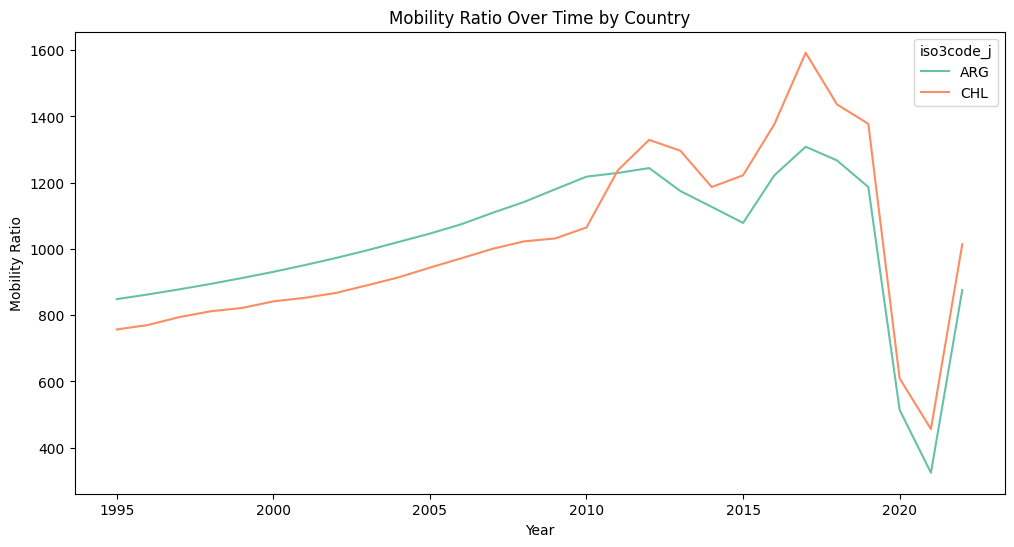

In [118]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='mobility_ratio', hue='iso3code_j', data=country_source_df_grp, palette = "Set2")
plt.title('Mobility Ratio Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Mobility Ratio')
plt.show()